In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cleaned.csv')
df.tail()

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
790,60827,25,43996,44002,0,48,0,168.0,26,348,...,1217.8,0.0,0.1,0,4,0.0,14.0,28577,60827-25,POINT (-87.633087 41.650765)
791,60827,20,43961,43967,8,35,28,122.5,37,193,...,675.4,0.2,0.2,1,4,3.5,14.0,28577,60827-20,POINT (-87.633087 41.650765)
792,60827,17,43940,43946,5,19,18,66.5,31,89,...,311.4,0.2,0.2,1,2,3.5,7.0,28577,60827-17,POINT (-87.633087 41.650765)
793,60827,16,43933,43939,0,14,0,49.0,14,58,...,203.0,0.0,0.2,0,1,0.0,3.5,28577,60827-16,POINT (-87.633087 41.650765)
794,60827,21,43968,43974,3,38,10,133.0,42,235,...,822.3,0.1,0.2,0,4,0.0,14.0,28577,60827-21,POINT (-87.633087 41.650765)


In [3]:
#cv.dtypes

In [4]:
### BEGIN SOLUTION
df = df.drop(columns=['Row ID','ZIP Code Location', 'ZIP Code'])

df.head()

,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population
0,18,43947,43953,13,51,89,347.5,71,295,484,2010.2,0.2,0.2,1,4,6.8,27.3,14675
1,19,43954,43960,6,57,41,388.4,77,372,525,2534.9,0.1,0.2,1,5,6.8,34.1,14675
2,14,43919,43925,4,26,27,177.2,21,100,143,681.4,0.2,0.3,0,0,0.0,0.0,14675
3,23,43982,43988,1,63,7,429.3,72,694,491,4729.1,0.0,0.1,1,6,6.8,40.9,14675
4,22,43975,43981,1,62,7,422.5,91,622,620,4238.5,0.0,0.1,0,5,0.0,34.1,14675


In [5]:
#Fixing Messy Column Names
df.columns = df.columns.str.strip().str.lower().str.replace('-', '').str.replace(' ', '_').str.replace('__', '_')

df.head()

,week_number,week_start,week_end,cases_weekly,cases_cumulative,case_rate_weekly,case_rate_cumulative,tests_weekly,tests_cumulative,test_rate_weekly,test_rate_cumulative,percent_tested_positive_weekly,percent_tested_positive_cumulative,deaths_weekly,deaths_cumulative,death_rate_weekly,death_rate_cumulative,population
0,18,43947,43953,13,51,89,347.5,71,295,484,2010.2,0.2,0.2,1,4,6.8,27.3,14675
1,19,43954,43960,6,57,41,388.4,77,372,525,2534.9,0.1,0.2,1,5,6.8,34.1,14675
2,14,43919,43925,4,26,27,177.2,21,100,143,681.4,0.2,0.3,0,0,0.0,0.0,14675
3,23,43982,43988,1,63,7,429.3,72,694,491,4729.1,0.0,0.1,1,6,6.8,40.9,14675
4,22,43975,43981,1,62,7,422.5,91,622,620,4238.5,0.0,0.1,0,5,0.0,34.1,14675


In [6]:
df.dtypes

week_number                             int64
week_start                              int64
week_end                                int64
cases_weekly                            int64
cases_cumulative                        int64
case_rate_weekly                        int64
case_rate_cumulative                  float64
tests_weekly                            int64
tests_cumulative                        int64
test_rate_weekly                        int64
test_rate_cumulative                  float64
percent_tested_positive_weekly        float64
percent_tested_positive_cumulative    float64
deaths_weekly                           int64
deaths_cumulative                       int64
death_rate_weekly                     float64
death_rate_cumulative                 float64
population                              int64
dtype: object

In [7]:
#df.info

In [8]:
# Assign X (data) and y (target)

## BEGIN SOLUTION
# X = df[['week_number', 'cases_weekly', 'cases_cumulative', 'case_rate_weekly',\
#        'case_rate_cumulative', 'tests_weekly', 'tests_cumulative', 'test_rate_weekly', 'test_rate_cumulative',\
#        'percent_tested_positive_weekly', 'percent_tested_positive_cumulative', 'deaths_cumulative',\
#        'death_rate_weekly', 'death_rate_cumulative', 'population']]
X = df.drop('deaths_weekly', axis = 1)
y = df['deaths_weekly'].values.reshape(-1, 1)
print(X.shape, y.shape)

(795, 17) (795, 1)


In [9]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
predictions = model.predict(X_test)
#model.fit(X_train, y_train)

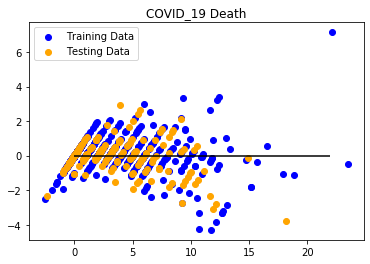

In [17]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("COVID_19 Death")
plt.show()

In [18]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8548465948842432, R2: 0.9422829522718175


In [19]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions3 = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8548465948842432, R2: 0.9423531393784174


In [20]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions1 = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8548465948842432, R2: 0.9422847947250056


In [21]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions2 = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8548465948842432, R2: 0.9423611990871142


In [22]:
y_test_list = []
for y in y_test:
    y_test_list.append(y[0])
predictions_list = []
for pred in predictions:
    predictions_list.append(pred[0])


In [23]:
comparison = pd.DataFrame({"Predicted": predictions_list, "Actual": y_test_list})
print(comparison)

     Predicted  Actual
0     0.866277       1
1     3.811002       3
2    -0.377928       0
3    -0.379608       0
4    -0.723390       0
..         ...     ...
194   4.397823       5
195   5.875395       6
196  10.318194      10
197   2.143611       2
198  -0.040291       1

[199 rows x 2 columns]


In [27]:
comparison.to_csv('actual_predicted.csv')